# Low Rank Factorization

## Gradient Check
Let's confirm that gradients are computed correctly first.

In [1]:
import lowrank
import numpy as np

np.random.seed(0)
rand_training_mat, rand_test_mat= np.random.rand(5, 5), np.random.rand(5, 5)
rand_training_mat[rand_training_mat < 0.50] = 0 
rand_test_mat[rand_training_mat == 0] = 0

print 'Randomly initialized training sparse matrix'
print rand_training_mat
print 'Randomly initialized test sparse matrix'
print rand_test_mat

Randomly initialized training sparse matrix
[[0.5488135  0.71518937 0.60276338 0.54488318 0.        ]
 [0.64589411 0.         0.891773   0.96366276 0.        ]
 [0.79172504 0.52889492 0.56804456 0.92559664 0.        ]
 [0.         0.         0.83261985 0.77815675 0.87001215]
 [0.97861834 0.79915856 0.         0.78052918 0.        ]]
Randomly initialized test sparse matrix
[[0.63992102 0.14335329 0.94466892 0.52184832 0.        ]
 [0.26455561 0.         0.45615033 0.56843395 0.        ]
 [0.6176355  0.61209572 0.616934   0.94374808 0.        ]
 [0.         0.         0.6976312  0.06022547 0.66676672]
 [0.67063787 0.21038256 0.         0.31542835 0.        ]]


In [2]:
factorizer = lowrank.Factorizer(rand_training_mat, rand_test_mat, feature_dim=3)

Factorizer is instantiated with U: (5, 3) and M: (5, 3)


In [3]:
grad_u, grad_m = factorizer.gradients()
num_grad_u, num_grad_m = factorizer.num_gradients()

print 'Matrix discrepancy between analytical gradients and numerical gradients'
print np.matrix.round(grad_u - num_grad_u, decimals=10)
print np.matrix.round(grad_m - num_grad_m, decimals=10)

Matrix discrepancy between analytical gradients and numerical gradients
[[ 1.14026313  0.85186867  1.22992644]
 [-1.02631043 -0.90818969 -0.60491458]
 [ 0.21043364  0.05294658  0.53408938]
 [-0.74027499 -0.73757579 -0.55106209]
 [-0.43279507 -0.50935008 -0.16784554]]
[[-0.56686795 -0.19530126 -0.20936388]
 [ 0.73540117  0.45773917  0.98451371]
 [ 0.39193428  0.17854584  0.66514679]
 [-0.47354746 -0.29589877 -0.21148896]
 [-0.19076224 -0.124068   -0.08614241]]


## Real Data

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt


DATA_DIR = 'datasets/100k/'
converter = lowrank.MatrixConverter(movies_filepath=DATA_DIR + 'movies.csv',
                                    ratings_filepath=DATA_DIR + 'ratings.csv')
training_rating_mat, test_rating_mat = converter.get_rating_matrices()
factorizer = lowrank.Factorizer(training_rating_mat, test_rating_mat, feature_dim=3)

CSV data are loaded with 44229 training samples and 5065 test samples from 79 users on 9125 movies
Factorizer is instantiated with U: (79, 3) and M: (9125, 3)


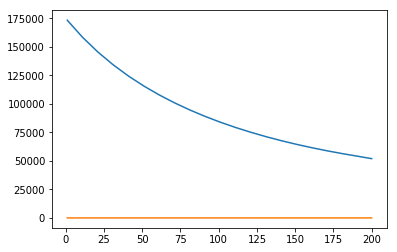

In [5]:
benchmarks = factorizer.train()
steps = [bm[0] for bm in benchmarks]
losses = [bm[1] for bm in benchmarks]
rmses = [bm[2] for bm in benchmarks]

plt.plot(steps, losses)
plt.plot(steps, rmses)
plt.show()